# Ejercicios 2, 3 y 4:

Ejercicio #2: Analiza el texto con la letra de la canción Heroes de David Bowie de 1977 (BowieHeroes.txt) para obtener una representación gráfica del vocabulario utilizado, sin tener en cuenta símbolos de puntuación ni stopwords, y la frecuencia de aparición de cada palabra.

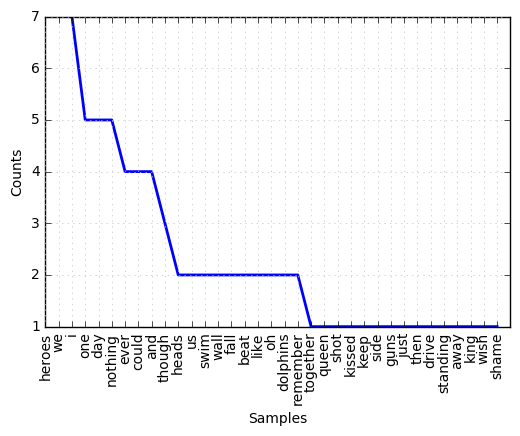

In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
punt = ['(', ')', ',', '.', ':']
words = []
english_stops = set(stopwords.words('english'))
for linea in open('BowieHeroes.txt','r'):
    wordsLin = [word.lower() for word in word_tokenize(linea) if word not in punt and word not in english_stops]
    words = words + wordsLin

fdis2 = FreqDist(words)
#print(fdis2.plot())
fdis2.plot()

In [3]:
import nltk.corpus
nltk.download('words')
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

#print(unusual_words(open('BowieLetsDance.txt','r')))
print(unusual_words(nltk.corpus.nps_chat.words()))
#print(unusual_words(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')))

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jmfel\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts', 'adoted', 'adreniline', 'ads', 'adults', 'afe', 'affairs', 'affari', 'affects', 'afk', 'agaibn', 'ages', 'aggravated', 'agurlwithbigguns', 'ahah', 'ahahah', 'ahahh', 'ahahha', 'ahh', 'ahhah', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'aiiiiiiiiiiiiiiiiiiiiiiii', 'aiken', 'aime', 'akdt', 'akon', 'akron', 'akst', 'aligator', 'allergies', 'allo', 'allowed', 'aloha', 'alohaaa', 'alohas', 'alot', 'alotta', 'alternatives', 'alterz', 'alwys', 'alzheimers', 'amazingness', 'americans', 'anithing', 'ans', 'answering', 'answers', 'antidepressants', 'anygirl', 'anymore', 'anythin', 'anytime', 'anyyyyyyyyyyyyyyyyy', 'aok', 'apoligize', 'appearently', 'appears', 'applaudes', 'appleton', 'appologise', 'appologize', 'aqwesome', 'arggghhh', 'argh', 'armtnpeat', 'arrested', 'arrived', 'arround', 'asked', 'askin', 'asking', 'asks', 'asl', 'asnwer', 

Ejercicio #4: Analiza el texto Moby Dick de Herman Melville 1851, que está en el corpus gutenberg (melville-moby_dyck.txt), utilizando tokenizer, stopwords y stemmer y sin considerar simbolos de puntuación. En concreto:
¿Cuántas palabras que no sean signos de puntuación ni stopwords tiene?
¿Cuál es el stem mas frecuente?
¿Cuántos stems aparecen una sola vez
¿Cuáles son los 50 stems más frecuentes y cuál es su frecuencia? Represéntalas gráficamente

No de stems diferentes =  30007
No de frases =  10059
No de palabras =  34243
No de palabras distintas =  30113
Stem mas frecuente =  sir
Numero de stems que aparecen una sola vez =  28904
Listado de los 50 stems más comunes y sus frecuencias
[('sir', 157), ('aye', 143), ('oh', 138), ('ye', 69), ("'s", 68), ('well', 60), ('isay', 54), ('queequeg', 50), ('inde', 47), ('saidi', 44), ('men', 42), ('man', 41), ('though', 38), ('boy', 37), ('cook', 37), ('yet', 35), ('nevertheless', 35), ('thati', 34), ('ha', 34), ('howev', 33), ('flask', 32), ('stubb', 32), ('gentlemen', 32), ('therefor', 30), ('starbuck', 30), ('perhap', 29), ('besid', 28), ('mr.starbuck', 26), ('criedahab', 26), ('shipmat', 25), ('ahab', 25), ('pip', 23), ('ah', 22), ('nay', 22), ('thoughti', 19), ('eh', 19), ('bildad', 19), ('captainahab', 19), ('andthen', 18), ('criedstubb', 18), ('saidstubb', 17), ('pull', 17), ('meantim', 16), ('come', 16), ('*', 16), ('atleast', 16), ('asitwer', 15), ('criedstarbuck', 15), ('...', 1

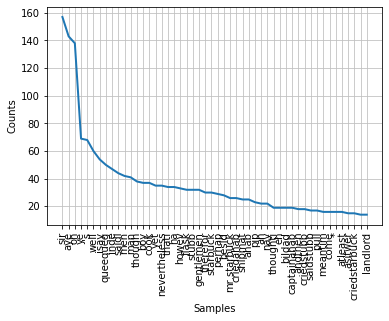

In [6]:
from nltk.corpus import gutenberg, stopwords
from nltk.probability import FreqDist
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize

english_stop = stopwords.words('english')
##words = gutenberg.words('melville-moby_dick.txt')
punt = ['(', ')', ',', '.', ':','[',']','-','--',';','!','?','\"','\'','\`','\'\'', '``']
words = []
frases = gutenberg.sents('melville-moby_dick.txt')
for f in frases:
#    print(str(f))
    for w in word_tokenize(''.join(f)):
        if w not in punt and w.lower() not in english_stop:
            words.append(w.lower())
vocab = set(words)
#print(vocab)
stemmer = PorterStemmer()
stems = []
for word in words:
    stems.append(stemmer.stem(word))
    
vocabStems = set(stems)
### ¿Cuántos stems distintos aparecen?
print("No de stems diferentes = ", len(vocabStems))

## ¿Cuántas palabras y frases tiene?
print("No de frases = ", len(frases))
print("No de palabras = ", len(words))
print("No de palabras distintas = ", len(vocab))

fdist = FreqDist(stems)
## ¿Cuál es el stem mas frecuente?
print("Stem mas frecuente = ", fdist.max())

##¿Cuantos stems aparecen una sola vez?
print("Numero de stems que aparecen una sola vez = ", len(fdist.hapaxes()))

##¿Cuáles son los 50 stems más frecuentes y cuál es su frecuencia?
print("Listado de los 50 stems más comunes y sus frecuencias")
print(fdist.most_common(50)) # fdist.pprint(50)
fdist.plot(50)